In [ ]:
"""
Purpose: To test the new v5 rules that have the following
changes

1) Better Width and Double Back Implementation


"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-05-28 15:28:07,217 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-05-28 15:28:07,219 - settings - Setting database.user to celiib
INFO - 2021-05-28 15:28:07,220 - settings - Setting database.password to newceliipass
INFO - 2021-05-28 15:28:07,224 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-05-28 15:28:07,225 - settings - Setting enable_python_native_blobs to True
INFO - 2021-05-28 15:28:07,239 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-05-28 15:28:07,699 - settings - Setting enable_python_native_blobs to True
INFO - 2021-05-28 15:28:07,702 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-05-28 15:28:07,703 - settings - Setting database.user to celiib
INFO - 2021-05-28 15:28:07,704 - settings - Setting database.password to newceliipass
INFO - 2021-05-28 15:28:07,705 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-05-28 15:28:07,705 - settings - Setting database.user to celiib
INFO - 2021-05-28 15:28:07,706 - settings - Setting database.password to newceliipass
INFO - 2021-05-28 15:28:07,709 - settings - Setting enable_python_native_blobs to True
INFO - 2021-05-28 15:28:08,189 - settings - Setting enable_python_native_blobs to True


In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-05-28 15:28:08,366 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-05-28 15:28:08,368 - settings - Setting database.user to celiib
INFO - 2021-05-28 15:28:08,368 - settings - Setting database.password to newceliipass
INFO - 2021-05-28 15:28:08,372 - settings - Setting enable_python_native_blobs to True
INFO - 2021-05-28 15:28:08,900 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Downloading Neurons to Test with

In [5]:
curr_table = minnie.AutoProofreadValidationScore5() * minnie.AutoProofreadValidationSegmentMap4()
curr_table

ver materialization version,nucleus_id nucleus id,segment_id the segment id in the proofread version,old_ver materialization version,split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,decomposition saved neuron object with high fidelity axon,axon_length axon length of the filtered neuron,validation_df,validation_df_ext,pre_tp,pre_tn,pre_fp,pre_fn,pre_precision,pre_recall,pre_f1,post_tp,post_tn,post_fp,post_fn,post_precision,post_recall,post_f1,run_time the amount of time to run (seconds),old_segment_id the segment id in the proofread version--,finished_dendrite whether axon was finished cleaning,finished_axon whether axon was finished cleaning,extension_type,n_somas,n_soma_mergers,n_glia,large_splits,notes
88.00,189149,864691135855890478,0.08,0,=BLOB=,369.84999619148164,=BLOB=,=BLOB=,7,160,11,0,0.3888888888888889,1.0,0.56,5281,7,39,3,0.9926691729323308,0.9994322482967449,0.9960392304790645,418.66,864691135585319036,True,True,full,1,0,0,0,
88.00,223037,864691136227167569,0.08,0,=BLOB=,63.375728490237755,=BLOB=,=BLOB=,0,450,0,0,nan,nan,nan,1,3410,3859,0,0.00025906735751295336,1.0,0.000518000518000518,287.46,864691135538120050,True,True,full,2,0,0,0,
88.00,225498,864691135753932237,0.08,0,=BLOB=,185.8554437449504,=BLOB=,=BLOB=,6,77,0,5,1.0,0.5454545454545454,0.7058823529411764,1124,0,0,9,1.0,0.9920564872021183,0.9960124058484714,112.02,864691135564655959,True,True,full,1,0,0,0,
88.00,230236,864691135609687047,0.08,0,=BLOB=,1573.0087006301437,=BLOB=,=BLOB=,34,550,11,16,0.7555555555555555,0.68,0.7157894736842104,1961,22,1,1,0.9994903160040775,0.9994903160040775,0.9994903160040775,407.91,864691135748568361,True,True,full,1,0,0,0,
88.00,236197,864691136903144370,0.08,0,=BLOB=,40.753447012345966,=BLOB=,=BLOB=,0,975,0,5,nan,0.0,nan,2750,2329,7,48,0.9974610083424011,0.9828448892065761,0.99009900990099,457.87,864691135758569550,True,True,full,2,0,2,0,
88.00,258307,864691135293126156,0.08,0,=BLOB=,1077.097912384558,=BLOB=,=BLOB=,43,340,12,27,0.7818181818181819,0.6142857142857143,0.6880000000000002,2984,7,25,19,0.9916915918909937,0.9936729936729937,0.9926813040585496,305.9,864691136194042326,True,True,full,1,0,0,0,
88.00,262773,864691136023889209,0.08,0,=BLOB=,191.70683649485437,=BLOB=,=BLOB=,9,48,2,0,0.8181818181818182,1.0,0.9,724,0,2,10,0.9972451790633609,0.9863760217983651,0.9917808219178083,93.06,864691135233108569,True,True,full,1,0,0,0,
88.00,264870,864691136951664863,0.08,0,=BLOB=,1049.8324448432375,=BLOB=,=BLOB=,31,422,2,1,0.9393939393939394,0.96875,0.9538461538461539,2008,25,4,33,0.9980119284294234,0.9838314551690348,0.9908709597828769,265.87,864691135740225387,True,True,full,1,0,0,0,
88.00,269247,864691135584074360,0.08,0,=BLOB=,2311.6931894709696,=BLOB=,=BLOB=,234,36,4,10,0.9831932773109243,0.9590163934426229,0.9709543568464729,806,0,7,65,0.991389913899139,0.9253731343283582,0.9572446555819477,356.56,864691136105498585,True,True,full,1,0,0,0,
88.00,269380,864691135974639471,0.08,0,=BLOB=,437.8471079089947,=BLOB=,=BLOB=,27,257,4,11,0.8709677419354839,0.7105263157894737,0.782608695652174,1863,4,8,3,0.9957242116515232,0.9983922829581994,0.9970564624029972,237.46,864691134988386682,True,True,full,1,0,0,0,


In [132]:
curr_segment_id = 864691135865773189 #look at high branching degree error later
curr_segment_id = 864691135293126156
curr_segment_id = 864691135233242713 #helded improve the width jump up
curr_segment_id = 864691136436509342
curr_segment_id = 864691135415666362
search_key = dict(segment_id=curr_segment_id)
(curr_table & search_key)#*minnie.AutoProofreadValidationSegmentMap4()

ver materialization version,nucleus_id nucleus id,segment_id the segment id in the proofread version,old_ver materialization version,split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,decomposition saved neuron object with high fidelity axon,axon_length axon length of the filtered neuron,validation_df,validation_df_ext,pre_tp,pre_tn,pre_fp,pre_fn,pre_precision,pre_recall,pre_f1,post_tp,post_tn,post_fp,post_fn,post_precision,post_recall,post_f1,run_time the amount of time to run (seconds),old_segment_id the segment id in the proofread version--,finished_dendrite whether axon was finished cleaning,finished_axon whether axon was finished cleaning,extension_type,n_somas,n_soma_mergers,n_glia,large_splits,notes
88.00,518853,864691135415666362,0.08,0,=BLOB=,3402.2069347927995,=BLOB=,=BLOB=,300,467,43,34,0.8746355685131195,0.8982035928143712,0.8862629246676514,9304,4,3,5,0.9996776619748576,0.99946288537974,0.9995702621400945,1003.33,864691135866394390,True,True,full,1,0,0,0,


In [133]:
"""
segment_id = 864691136003930314 # had some stray segments that were not correct



Conclusion: The double back angle is what is causing the differences in recall
"""

'\nsegment_id = 864691136003930314 # had some stray segments that were not correct\n\n\n\nConclusion: The double back angle is what is causing the differences in recall\n'

In [134]:
split_index = 0

segment_id = vu.new_to_old_segment_id(curr_segment_id)
decomp_path = (minnie.DecompositionAxon() & dict(segment_id=segment_id,
                                  split_index = split_index,
                                 )).fetch1("decomposition")
neuron_obj = du.filepath_to_neuron_obj(decomp_path)

Decompressing Neuron in minimal output mode...please wait


In [135]:
nviz.visualize_neuron(neuron_obj,
                     limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


# Doing the proofreading with version 5

In [104]:
exc_filters = [
        pru.exc_axon_on_dendrite_merges_filter,
        pru.exc_high_degree_branching_filter,
        pru.exc_axon_webbing_t_merges_filter,
        pru.exc_thick_t_merge_filter,
        pru.exc_width_jump_up_dendrite_filter,
        exc_width_jump_up_axon_filter,
        exc_double_back_dendrite_filter,
]

In [156]:
import proofreading_utils as pru
import validation_utils as vu
(filt_neuron,
             return_synapse_df_revised,
             return_synapse_df_errors,
            return_validation_df_revised,
            return_validation_df_extension) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                                filter_list = pru.v5_exc_filters(),#exc_filters,
                                #filter_list = exc_filters,
                                plot_limb_branch_filter_with_disconnect_effect = True,
                                verbose = True,
                                plot_score=False,
                                nucleus_id = 560217,
                                return_synapse_df_errors=True,
                                return_validation_df_extension = True,                                        
                                split_index=0)


*****Using v5 Filters!!!



--- Working on filter 0:
function = axon_on_dendrite_merges
function __name__ = filter_away_axon_on_dendrite_merges
function arguments = {'use_pre_existing_axon_labels': True}




Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh



--- Working on filter 1:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {'offset': 1500, 'comparison_distance': 2000, 'worst_case_match_threshold': 65, 'width_diff_max': 75, 'width_diff_perc': 60, 'match_threshold': 45, 'angle_buffer': 15, 'max_degree_to_resolve': 6, 'max_degree_to_resolve_wide': 8, 'match_method': 'best_match', 'kiss_check': True, 'kiss_check_bbox_longest_side_threshold': 450}




 ----- Working on coordinate 0: [1169053.   553487.8  981425.8]--------
Working on Kissing check because possible upstream matches greater than 1: [47, 59]
** triggered kiss check cut becuase cut_bbox_longest_side = 286.61964683048427***
winning_downstream = 59,error_downstream = [47 65] 
coordinate [1169053.   553487.8  981425.8] had error branches [47 65]--------


 ----- Working on coordinate 1: [1173955.86270029  442756.23296947 1021484.03436415]--------
Working on Kissing check because possible upstream matches greater than 1

winning_downstream = 514,error_downstream = [507 515] 
coordinate [1318298.92061258  570765.04127079  932526.80023219] had error branches [507 515]--------


 ----- Working on coordinate 30: [1322708.28494948  524808.11535102  958655.92000347]--------
winning_downstream = 493,error_downstream = [525 528 530] 
coordinate [1322708.28494948  524808.11535102  958655.92000347] had error branches [525 528 530]--------


 ----- Working on coordinate 31: [1328140.87572264  665558.60501436  920428.01137976]--------
winning_downstream = None,error_downstream = [] 
coordinate [1328140.87572264  665558.60501436  920428.01137976] had error branches []--------


 ----- Working on coordinate 32: [1328208.34383896  510880.20597827  951792.23904335]--------
Working on Kissing check because possible upstream matches greater than 1: [535, 539]
winning_downstream = 539,error_downstream = [535 538] 
coordinate [1328208.34383896  510880.20597827  951792.23904335] had error branches [535 538]--------
limb_br


--- Working on filter 2:
function = axon_webbing_t_merges
function __name__ = filter_away_webbing_t_merges
function arguments = {'child_width_maximum': 75, 'parent_width_maximum': 75, 'axon_only': True, 'error_if_web_is_none': True, 'web_size_threshold': 120, 'web_size_type': 'ray_trace_median', 'web_above_threshold': True}


limb_branch_dict_to_cancel = {}

--- Working on filter 3:
function = thick_t_merge
function __name__ = filter_away_thick_t_merge
function arguments = {}


limb_branch_dict_to_cancel = {}

--- Working on filter 4:
function = width_jump_up_dendrite
function __name__ = filter_away_width_jump_up_dendrite
function arguments = {}


limb_branch_dict_to_cancel = {}

--- Working on filter 5:
function = width_jump_up_axon
function __name__ = filter_away_width_jump_up_axon
function arguments = {}


limb_branch_dict_to_cancel = {}

--- Working on filter 6:
function = double_back_dendrite
function __name__ = filter_away_double_back_dendrite
function arguments = {}


limb_bran


--- Working on filter 8:
function = double_back_axon_thick
function __name__ = filter_away_double_back_axon_thick
function arguments = {}


limb_branch_dict_to_cancel = {}

--- Working on filter 9:
function = axon_fork_divergence
function __name__ = filter_away_small_axon_fork_divergence
function arguments = {'divergence_threshold_mean': 165}


limb_branch_dict_to_cancel = {}



 ---- Total time for applying filter: 254.7551007270813 -----

--- Finished Part 1: Filtering Neuron -----
Apply the presyn non_error
For presyn: # valid synapses = 367, # error synapses  = 477, # error presyns = 40
For postsyn: # valid synapses = 9307, # error synapses  = 9, # error presyns = 0
presyn_error = [323206451 324953713 332813851 333028029 335863859 335865364 335865591
 335865648 336633715 336633976 336634097 336863530 336890066 336890248
 340202864 343224305 343224381 343224403 346445205 349562264 350124018
 350124269 350988585 350988680 354265403 356579727 356637723 357942427
 360238123 363248063 

# Getting the Results

In [157]:
presyn_scores_dict = vu.scores_presyn(return_validation_df_revised)
postsyn_scores_dict = vu.scores_postsyn(return_validation_df_revised)

cat = vu.synapse_validation_df_to_category_counts(return_validation_df_revised,
                                    print_postsyn=True,
                                    print_presyn=True)

print(presyn_scores_dict,postsyn_scores_dict)

Presyn counts:
TP:324
TN:467
FP:43
FN:10
Postsyn counts:
TP:9304
TN:4
FP:3
FN:5
{'precision': 0.8828337874659401, 'recall': 0.9700598802395209, 'f1': 0.9243937232524965} {'precision': 0.9996776619748576, 'recall': 0.99946288537974, 'f1': 0.9995702621400945}


In [138]:
minnie.AutoProofreadValidationScore4() & search_key

ver materialization version,nucleus_id nucleus id,segment_id the segment id in the proofread version,old_ver materialization version,split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,decomposition saved neuron object with high fidelity axon,axon_length axon length of the filtered neuron,validation_df,validation_df_ext,pre_tp,pre_tn,pre_fp,pre_fn,pre_precision,pre_recall,pre_f1,post_tp,post_tn,post_fp,post_fn,post_precision,post_recall,post_f1,run_time the amount of time to run (seconds)
88.00,518853,864691135415666362,0.08,0,=BLOB=,3479.5429689276298,=BLOB=,=BLOB=,324,475,35,10,0.9025069637883009,0.9700598802395209,0.9350649350649352,9304,4,3,5,0.9996776619748576,0.99946288537974,0.9995702621400945,1027.2


In [140]:
(curr_table & search_key).fetch("pre_precision","pre_recall","pre_f1",
                               "post_precision","post_recall","post_f1")

[array([0.87463557]),
 array([0.89820359]),
 array([0.88626292]),
 array([0.99967766]),
 array([0.99946289]),
 array([0.99957026])]

In [141]:
# return_validation_df_revised[(return_validation_df_revised["synapse_type"]=="presyn") &
#                             (return_validation_df_revised["manual_valid"] == True )]

In [142]:
vu.plot_validation_synapses(filt_neuron.segment_id,
                            validation_df = return_validation_df_revised,
                             synapse_dict = None,
                             synapses_type_to_plot = None,
                             synapses_type_to_not_plot = None,
                             verbose=False,
                             synapse_type = "presyn",
                             TP_color="yellow",
                            TN_color="aqua",
                            FP_color="black",
                            FN_color="orange",
                             synapse_scatter_size = 0.15,
                             
                             #for plotting the actual mesh parts to go along
                             
                             neuron_obj = filt_neuron,
                             plot_only_axon_skeleton = True,
                             error_mesh_color = "red",
                             valid_mesh_color = "green",
                             valid_skeleton_color = "black",
                             mesh_alpha = 0.3,)

Using the mesh from the neuron object


TP:yellow
TN:aqua
FP:black
FN:orange


In [118]:
nru.width(filt_neuron[0][58])

1071.2637469532451

# Debugging the Dendrite Axon Jump Up

In [127]:
nviz.plot_limb_branch_dict(filt_neuron,ed.dendrite_branch_restriction(filt_neuron))


 Working on visualization type: mesh


In [108]:
nru.branch_path_to_start_node(neuron_obj[0],58)

array([66, 67])

In [121]:
[filt_neuron[0][k].skeletal_length for k in nru.branch_path_to_start_node(filt_neuron[0],58)]

[5517.302862129638,
 11506.873045741244,
 6586.0686670921505,
 12180.203242820055,
 1067.317524399756,
 7506.849719026368,
 11631.825195348518,
 2329.466627031444,
 5648.149297119775,
 5705.46905823018,
 188.74249958974113]

limb_name = L0

 Working on visualization type: mesh

 Working on visualization type: skeleton


No limb name was given so using L0 because was the limb in the first key


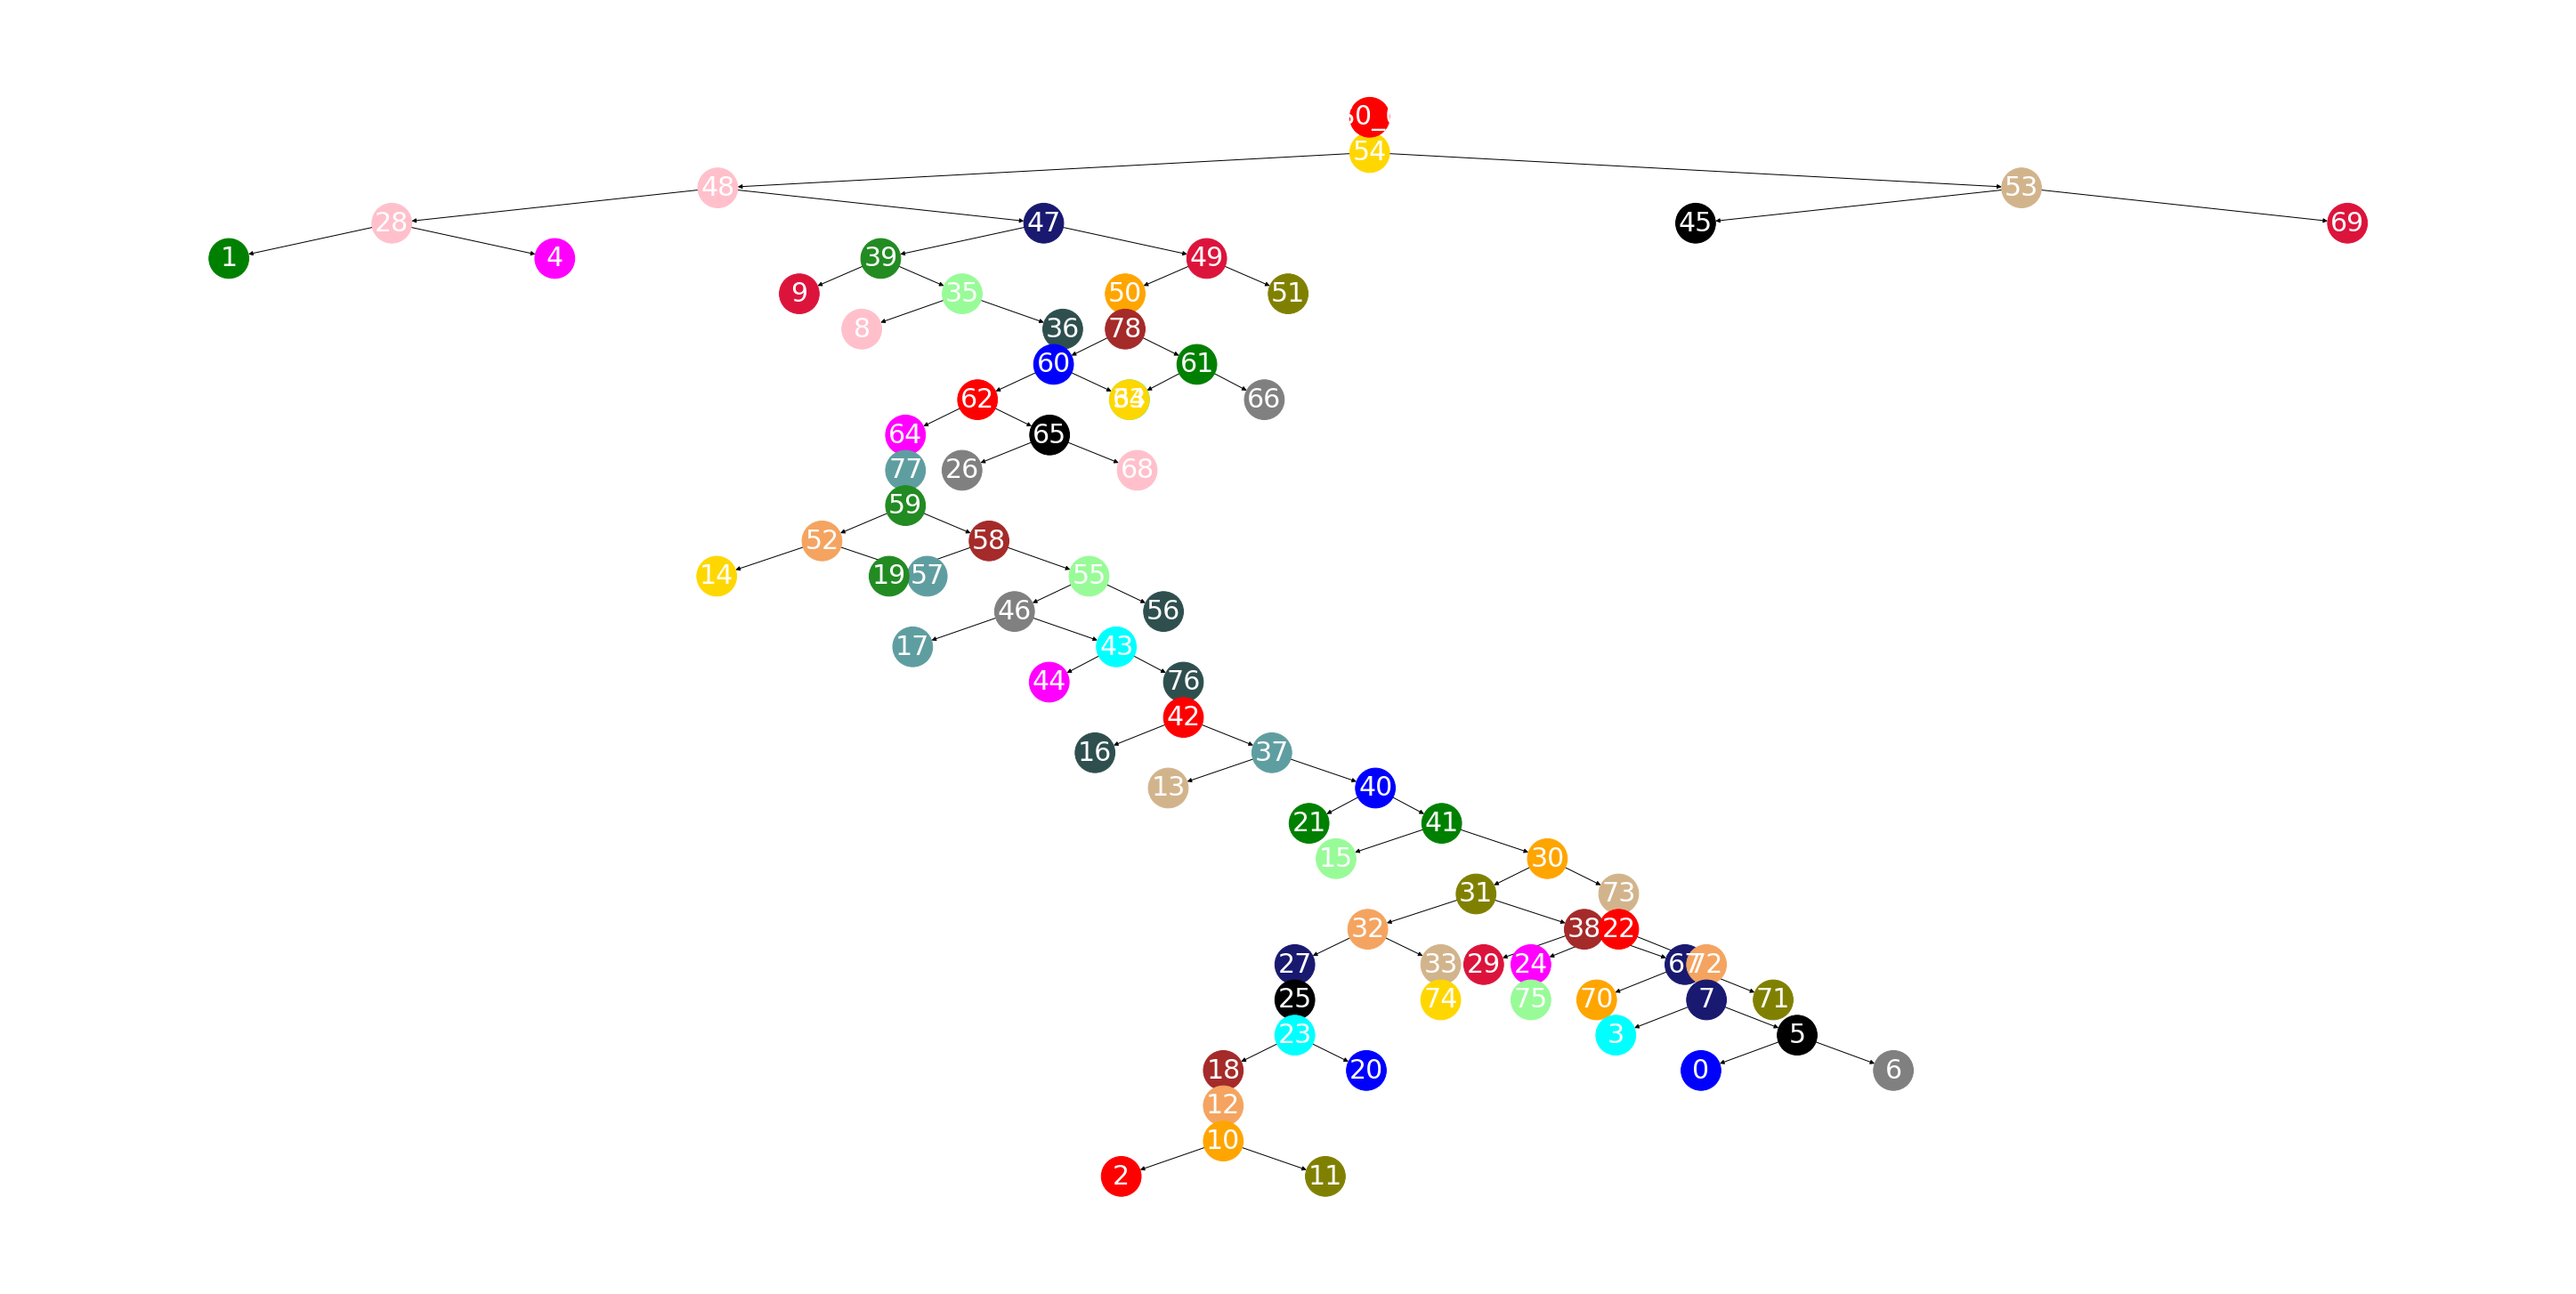

In [114]:
nviz.visualize_neuron_specific_limb(filt_neuron,0)

# Debugging the Axon Jump Up

In [76]:
filt_neuron.description

'0_25_axon_v5'

In [61]:
min_upstream_width = nru.min_width_upstream(neuron_obj[5],
                          branch_idx=106,
                          skeletal_length_min = 2000,
                            verbose = True)

path_to_start = [98 70 75]
path_widths = [262.47638404 224.44000656 315.65811613]
path_widths AFTER REMOVING ZEROS= [262.4763840415905, 224.4400065649943, 315.6581161261297]
min_path_width = 224.4400065649943


In [57]:
neuron_obj[5][78].width_new

{'median_mesh_center': 0.0,
 'no_spine_median_mesh_center': 0.0,
 'no_bouton_median': 0.0}

limb_name = L5

 Working on visualization type: mesh

 Working on visualization type: skeleton


No limb name was given so using L5 because was the limb in the first key


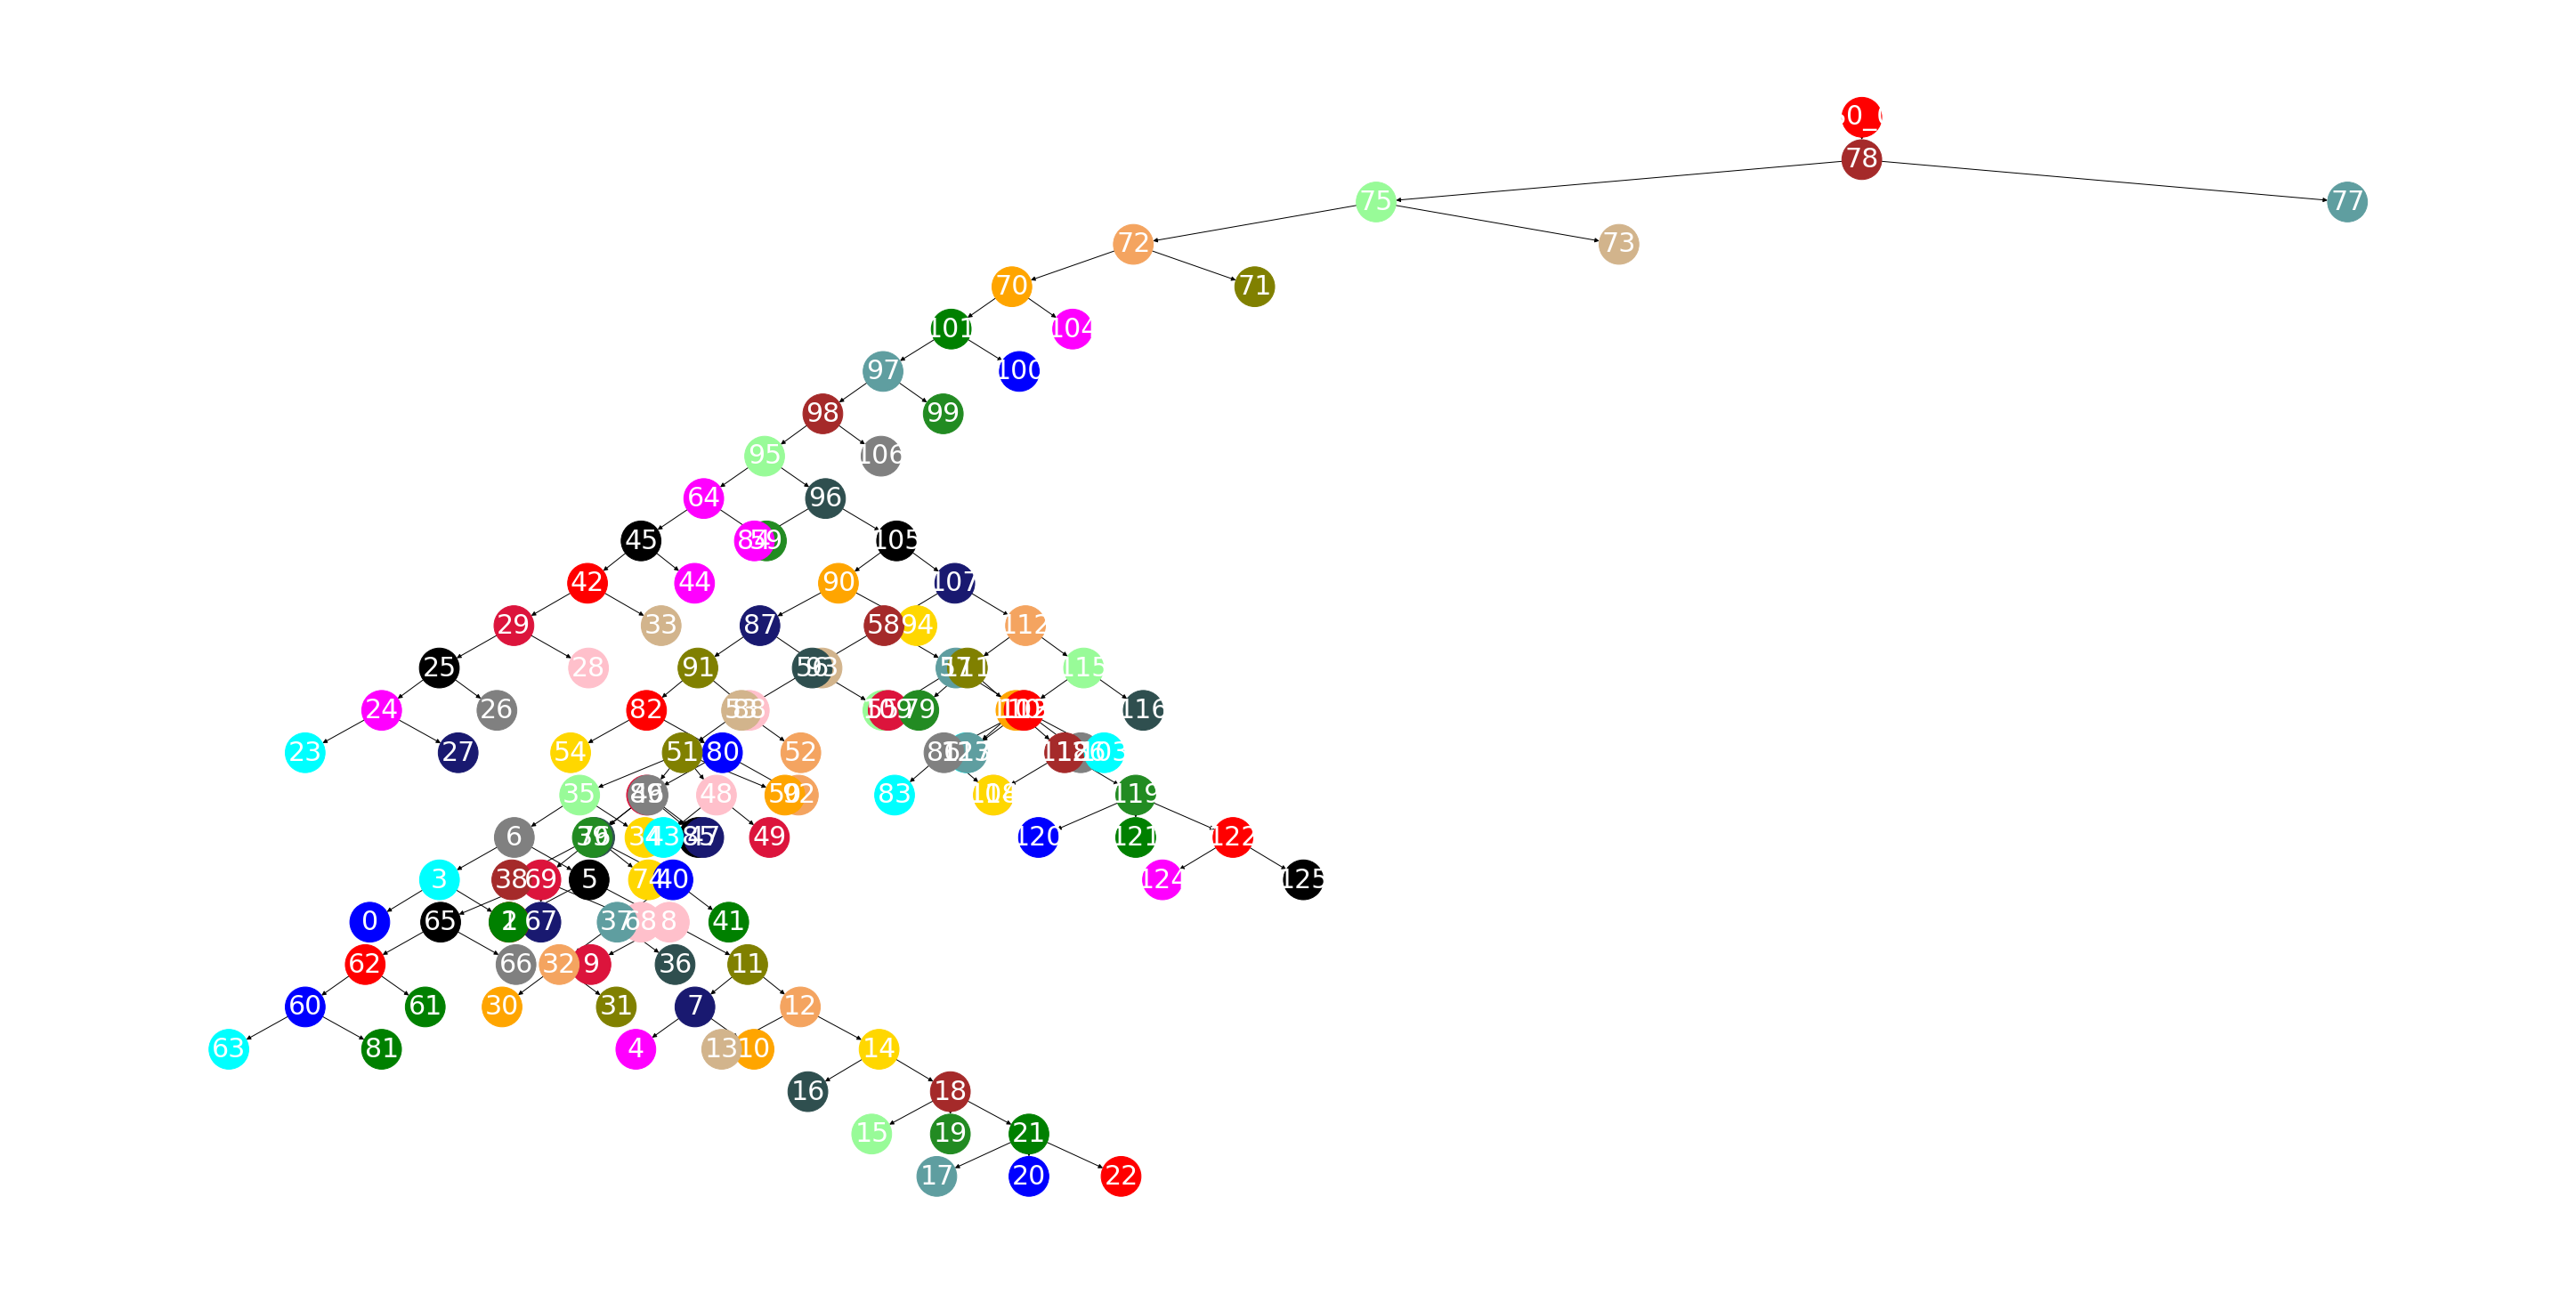

In [54]:
nviz.visualize_neuron_specific_limb(neuron_obj,5)

In [52]:
import error_detection as ed
ed.width_jump_up_axon(neuron_obj,
                     verbose = True)

After skeletal restrictions, limb_branch_dict_restriction = {'L5': array([  1,   2,   5,   6,   7,  12,  14,  17,  21,  23,  24,  25,  27,
        29,  32,  33,  35,  39,  40,  43,  45,  48,  51,  53,  54,  56,
        57,  58,  59,  61,  64,  79,  83,  84,  86, 102, 103, 106, 107,
       108, 110, 111, 112, 113, 115, 117, 118])}
width_jump_limb_branch_df = 
   limb  node  width_jump_from_upstream_min
0    L5     1                     54.309072
1    L5     2                     45.203542
2    L5     5                     70.841924
3    L5     6                     61.051808
4    L5     7                     62.966320
5    L5    12                     49.690265
6    L5    14                     47.807504
7    L5    17                     45.455571
8    L5    21                     60.324404
9    L5    23                     56.815455
10   L5    24                     58.780764
11   L5    25                     58.345840
13   L5    29                     82.295855
14   L5    32          

{'L5': array([  1,   2,   5,   6,   7,  12,  14,  17,  21,  23,  24,  25,  29,
         32,  33,  35,  39,  40,  43,  45,  48,  51,  53,  54,  56,  57,
         58,  59,  61,  64,  79,  83,  84,  86, 102, 103, 106, 107, 108,
        110, 111, 112, 113, 115, 117, 118])}

# Debugging the High Degree Filtering 

In [ ]:
filt_neuron

In [ ]:
presyn_scores_dict = vu.scores_presyn(return_validation_df_revised)
postsyn_scores_dict = vu.scores_postsyn(return_validation_df_revised)

cat = vu.synapse_validation_df_to_category_counts(return_validation_df_revised,
                                    print_postsyn=True,
                                    print_presyn=True)

print(presyn_scores_dict,postsyn_scores_dict)

In [ ]:
(curr_table & search_key).fetch("pre_precision","pre_recall","pre_f1",
                               "post_precision","post_recall","post_f1")

# Plotting the Proofread Neuron

In [ ]:
vu.plot_validation_synapses(filt_neuron.segment_id,
                            validation_df = return_validation_df_revised,
                             synapse_dict = None,
                             synapses_type_to_plot = None,
                             synapses_type_to_not_plot = None,
                             verbose=False,
                             synapse_type = "presyn",
                             TP_color="yellow",
                            TN_color="aqua",
                            FP_color="black",
                            FN_color="orange",
                             synapse_scatter_size = 0.15,
                             
                             #for plotting the actual mesh parts to go along
                             
                             neuron_obj = filt_neuron,
                             plot_only_axon_skeleton = True,
                             error_mesh_color = "red",
                             valid_mesh_color = "green",
                             valid_skeleton_color = "black",
                             mesh_alpha = 0.3,)

In [ ]:
(242 - 1.75*121)/2

# The current performance

In [ ]:
v4_old_seg_ids = (minnie.AutoProofreadValidationScore4()*minnie.AutoProofreadValidationSegmentMap4()
 & "pre_recall<0.3").fetch("old_segment_id")

In [ ]:
v5_old_seg_ids = (minnie.AutoProofreadValidationScore5()*minnie.AutoProofreadValidationSegmentMap4()
 & "pre_recall<0.3").fetch("old_segment_id")

In [ ]:
import numpy as np
np.setdiff1d(v5_old_seg_ids,v4_old_seg_ids)

In [ ]:
minnie,_ = du.configure_minnie_vm()
validation_dfs = minnie.AutoProofreadValidationScore5().fetch("validation_df")
validation_dfs = [vu.load_df_val_from_numpy(k) for k in validation_dfs]
validation_dfs

In [ ]:
import pandas_utils as pu
total_validation_df = pu.concat(validation_dfs)
total_validation_df
vu.synapse_validation_df_to_score_plot(total_validation_df)

# Debug 1) Cutting off of Dendrites

In [ ]:
import error_detection as ed
return_limb_branch = ed.width_jump_up_dendrite(neuron_obj)
return_limb_branch

# Debug 2) double_back_axon_thin

In [ ]:
return_limb_branch=  ed.double_back_axon_thin(neuron_obj,
                                             plot_double_back_errors=True)
return_limb_branch 

"""
Conclusion: Had an incorect parameters set

"""

In [ ]:
nru.upstream_node(neuron_obj[3],9)

In [ ]:
nviz.plot_limb_path(neuron_obj[3],[9,8])

In [ ]:
nru.find_parent_child_skeleton_angle(neuron_obj[3],
                                     child_node=9,
                                    plot_extracted_skeletons = True)